PCA plot saved to pca_plot.png 


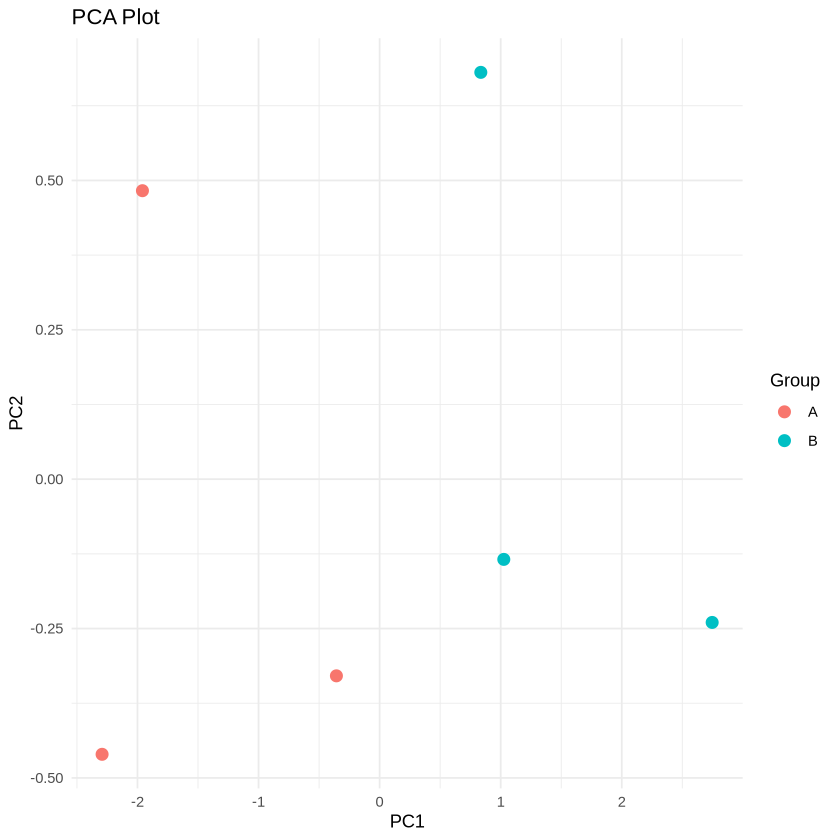

In [6]:
# Load libraries
library(ggplot2)

# ====== Set your parameters here ======
input_file <- "./galaxy_inputs/TestXinput/test.csv.csv"   # Path to your input CSV file
output_file <- "pca_plot.png"         # Path to save the output PNG
group_column <- "Group"               # Set to NULL if no group column, or column name as string
# ======================================

# Read data
data <- read.csv(input_file)

# Check if group column exists
if (!is.null(group_column)) {
  if (!(group_column %in% colnames(data))) {
    stop(paste("Group column", group_column, "not found in input data."))
  }
  group <- data[[group_column]]
  numeric_data <- data[, sapply(data, is.numeric)]
} else {
  group <- NULL
  numeric_data <- data[, sapply(data, is.numeric)]
}

# Perform PCA
pca <- prcomp(numeric_data, scale. = TRUE)

# Extract scores
scores <- as.data.frame(pca$x)
scores$Group <- if (!is.null(group)) group else "All"

# Create PCA plot
p <- ggplot(scores, aes(x = PC1, y = PC2, color = Group)) +
  geom_point(size = 3) +
  labs(title = "PCA Plot", x = "PC1", y = "PC2") +
  theme_minimal()

# Save plot
ggsave(filename = output_file, plot = p, width = 6, height = 5, dpi = 300)

cat("PCA plot saved to", output_file, "\n")

print(p)
